<a href="https://colab.research.google.com/github/ZohoorAlmalki/RNN/blob/main/Copy_of_RNN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recurrent Neural Networks (RNNs)

**Why Recurrent Neural Networks (RNNs)?**

Humans process information sequentially, building understanding over time. For example, when reading a sentence, each word is interpreted in the context of previous words.

1. Handling Variable-Length Sequences
  - Many real-world problems (e.g., speech recognition, time-series forecasting, language translation) involve inputs or outputs of varying lengths.
  - Traditional neural networks require fixed-size inputs/outputs, making them inflexible for such tasks. RNNs, however, can process sequences of arbitrary length **by looping over each step**.
2. Need for Context/Memory
  - Tasks like speech recognition depend on context (e.g., previous words/frames help interpret the current one).
  - Feedforward networks lack a mechanism to retain past information explicitly. RNNs address this by maintaining a **hidden state** that acts as a "memory" of previous inputs.
**Limitations of Feedforward Networks**
  - A traditional neural network treats each input independently (e.g., classifying individual images). For sequential data, this is inefficient—it ignores temporal dependencies.
  - Example: Predicting the next word in a sentence requires knowledge of prior words. RNNs pass information from earlier steps to later ones through their recurrent connections.
  



---

### RNN
* RNNs address this issue!
* Recurrent Neural Networks take the previous output or hidden states as inputs. The composite
input at time t has some historical information about the happenings at time T < t
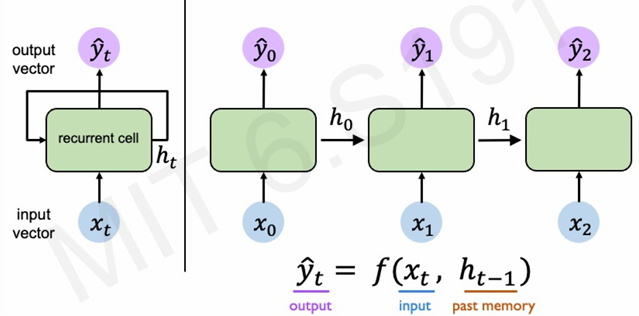





---
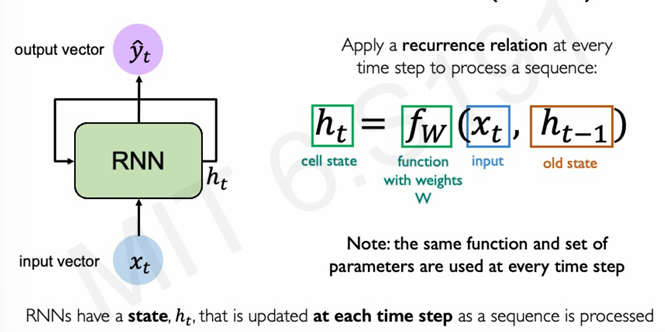




---

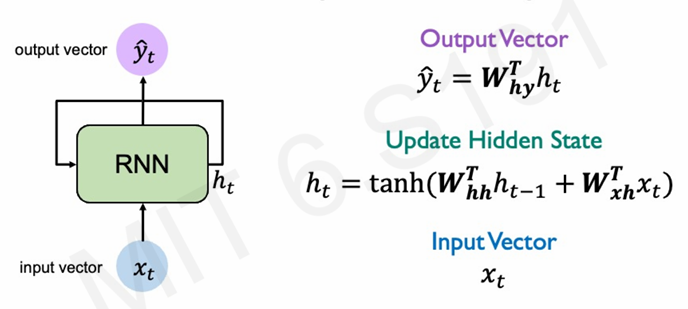


---



### **RNNs For Sequence Modeling**
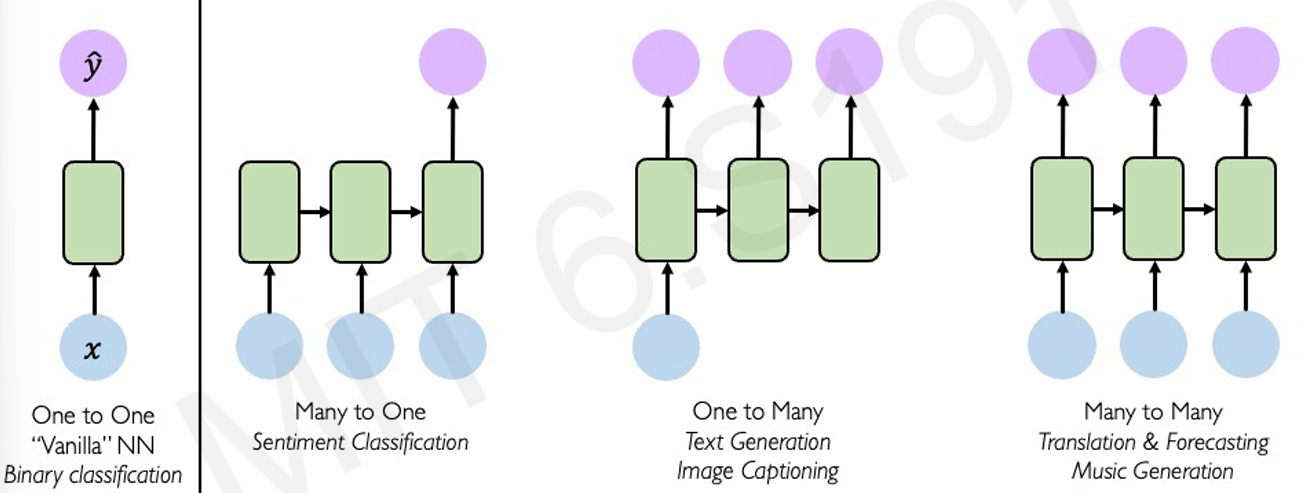

### **Sequence Modeling: Design Criteria**
To model sequences, we need to:
1. Handle **variable-length** sequences.
2. Track **long-term** dependencies.
3. Maintain information about **order**.
4. **Share parameters** across the sequences.

RNNs meet these sequence modeling design criteria

---

### **Sequence Modeling Problem: Predict the Next Word**

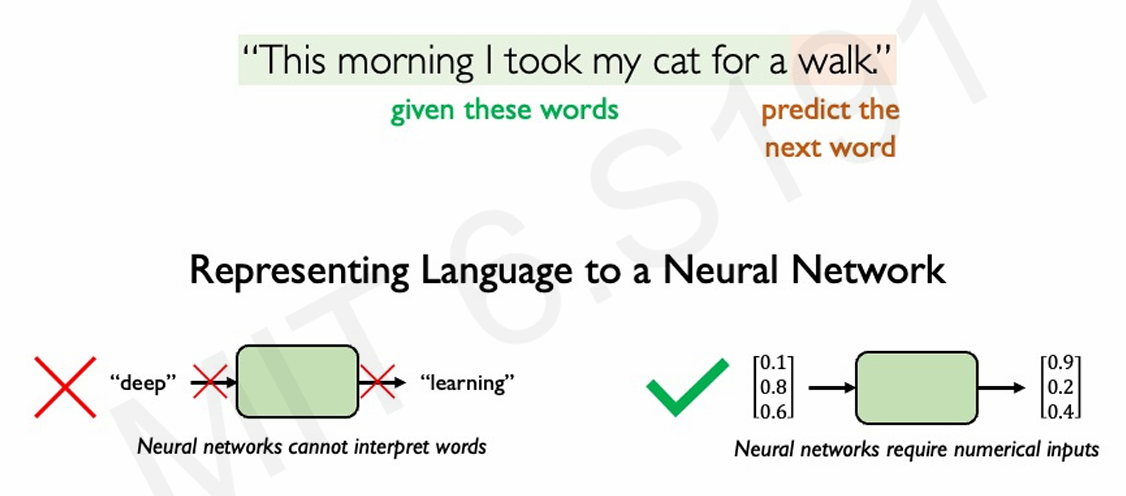

---

### **Encodeing Language for a Neural Networks**
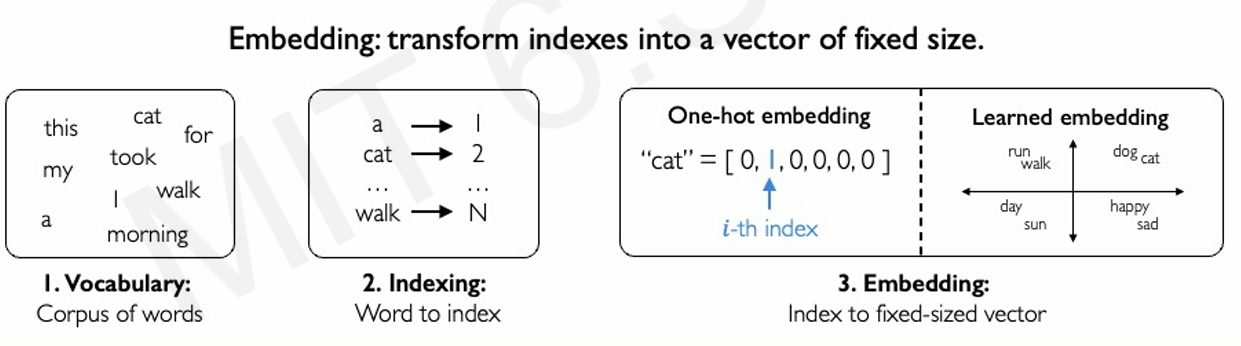

---
### **Recall: Backpropagation in Feed Forward Models**
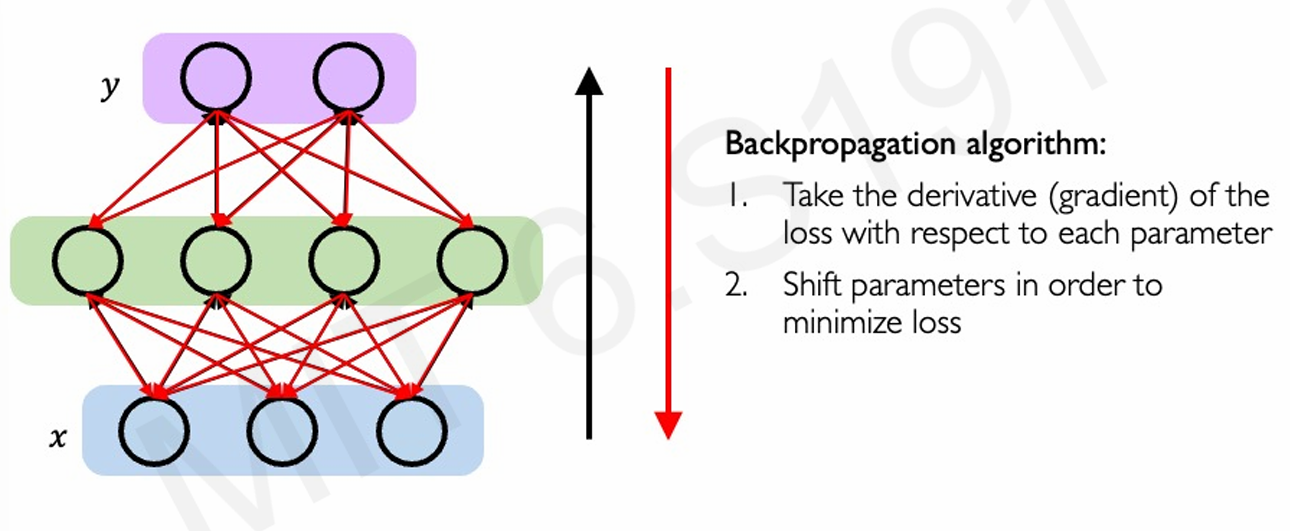

---
### **RNNs: Backpropagation Throughout Time**
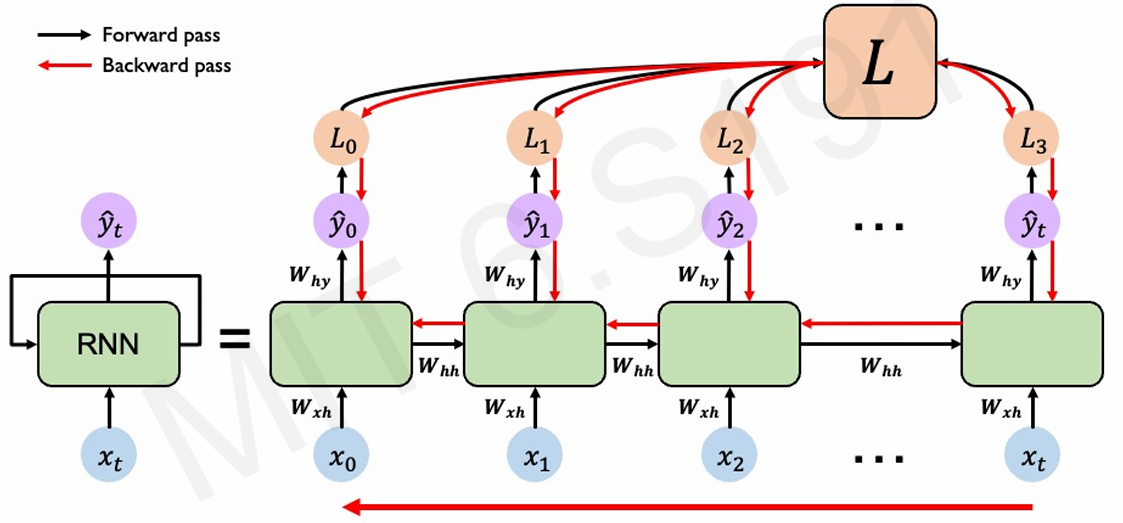

---
### **Standard RNN Gradient Flow: Exploding Gradients**
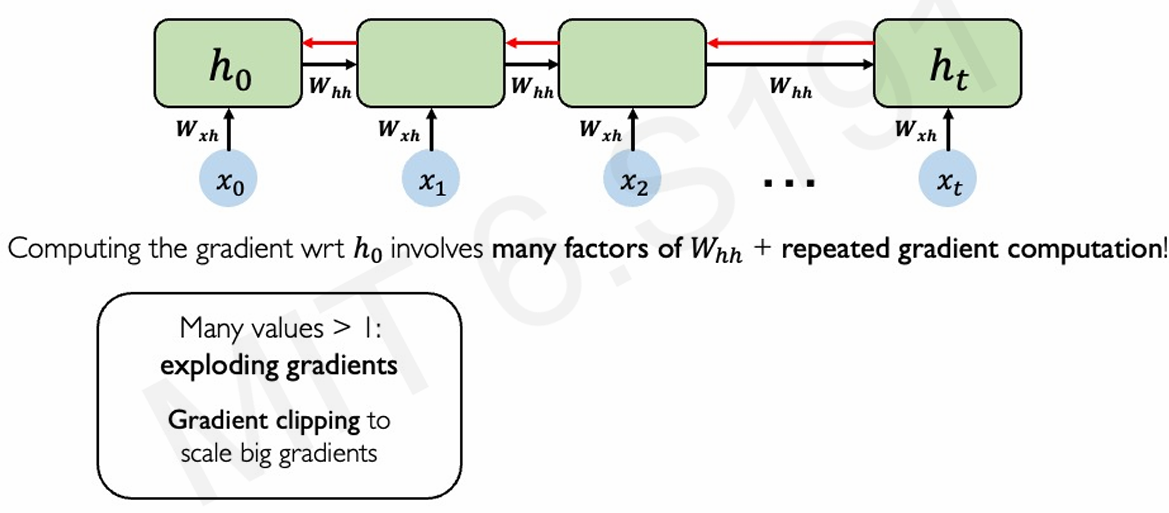

---
### **Standard RNN Gradient Flow: Vanishing Gradients**

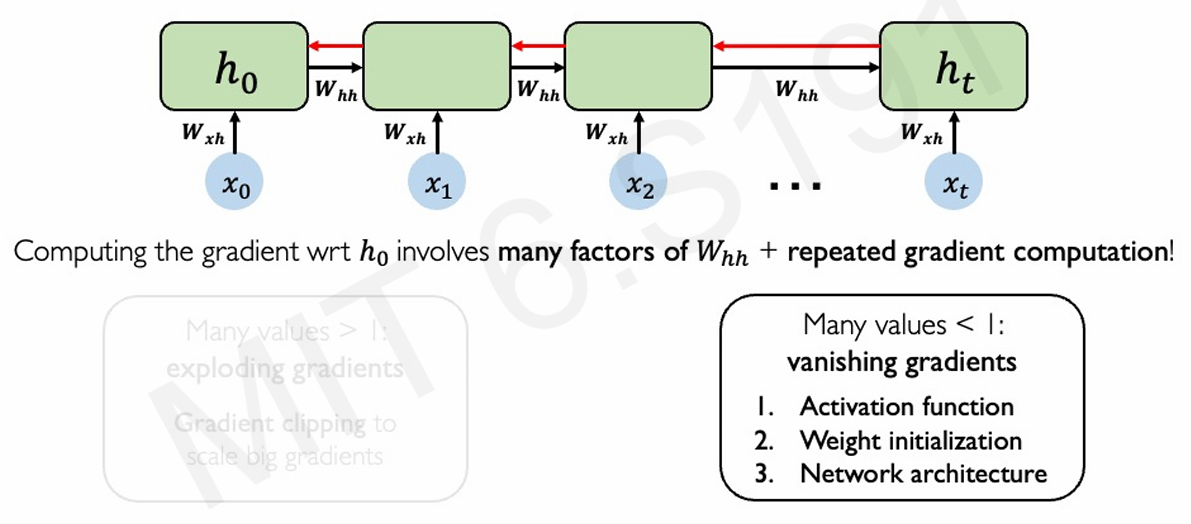

---
### **The Problem of Long-Term Dependencies**

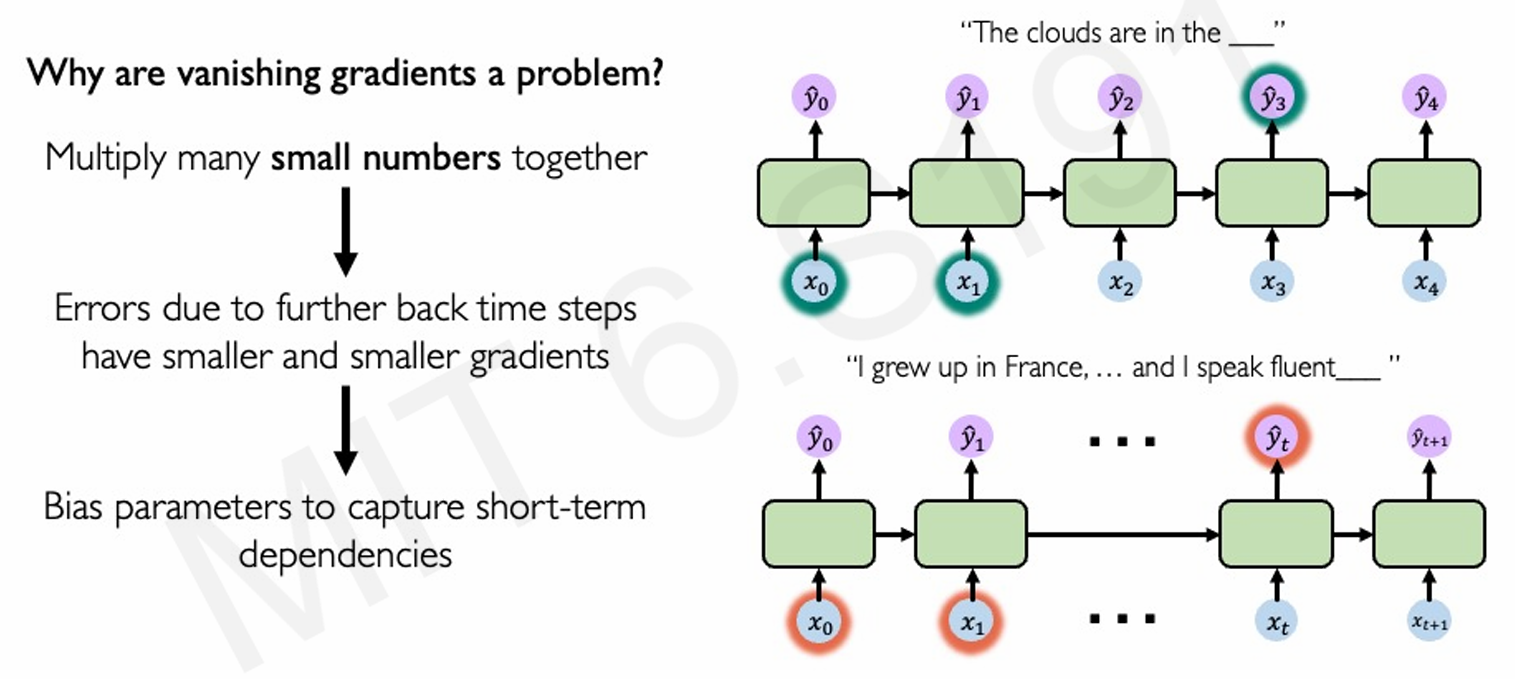

---
### **Gating Mechanisms in Neurons**

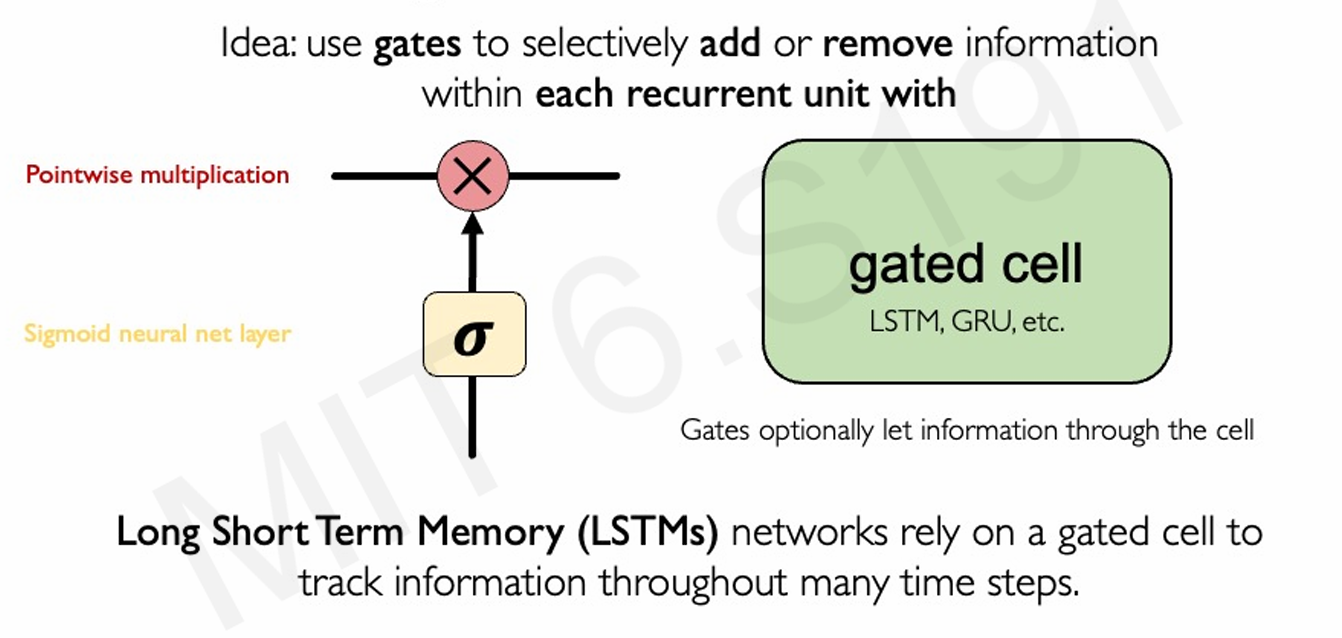

### **Long Short-Term Memory networks (LSTMs)**
- A type of RNN architecture that addresses the vanishing/exploding gradient problem and allows learning of long-term dependencies.
- Recently risen to prominence with state-of-the-art performance in speech recognition, language modeling, translation, image captioning.

**Central Idea**: A **memory cell**(interchangeably block) which can maintain its state over time, consisting of an explicit memory (aka the cell state vector) and gating units which regulate the information flow into and out of the memory.

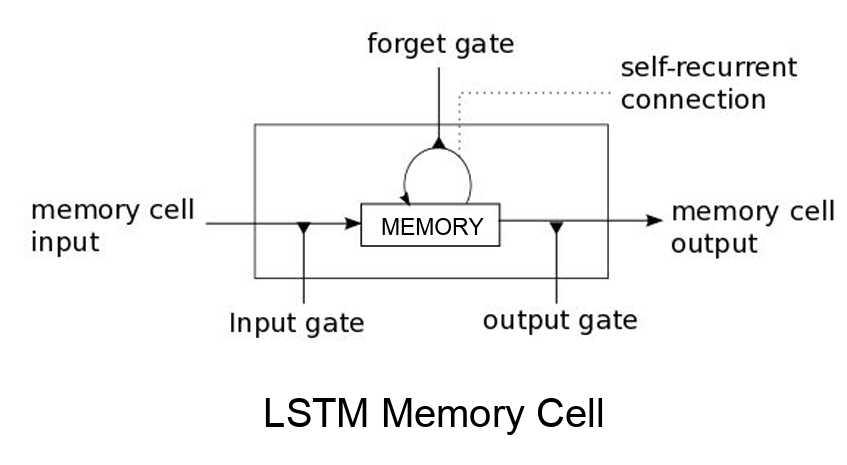

---


### **Cell state vector**
- Represents the memory of the LSTM
- Undergoes changes via forgetting of old memory (forget gate) and addition of new memory (input gate)
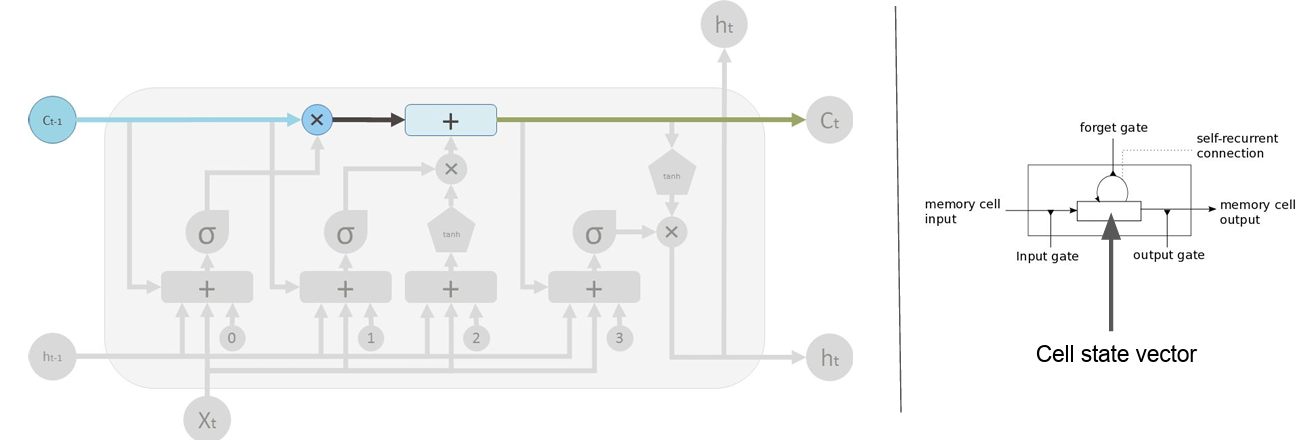

---
### **Gates**
- **Gate**: sigmoid neural net layer followed by pointwise multiplication operator
- Gates control the flow of information to/from the memory
- Gates are controlled by a concatenation of the output from the previous time step and the current input and optionally the cell state vector.

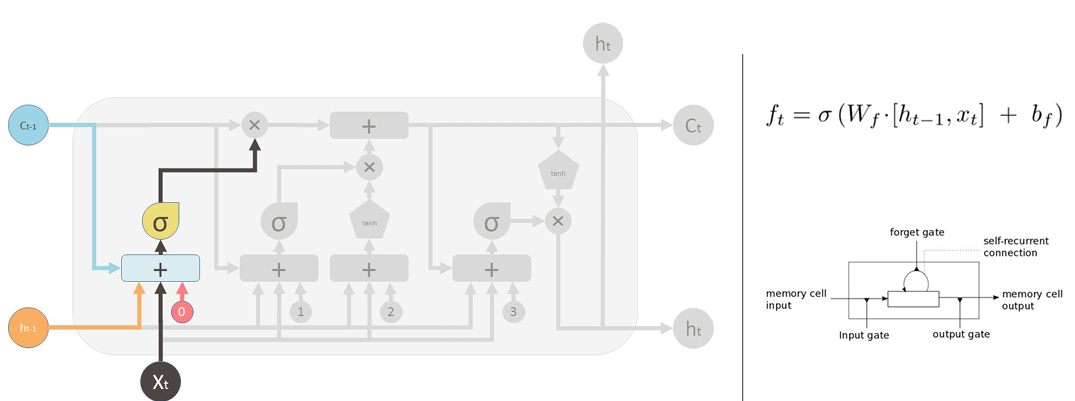

---
### **Forget Gate**
- Controls what information to throw away from memory.

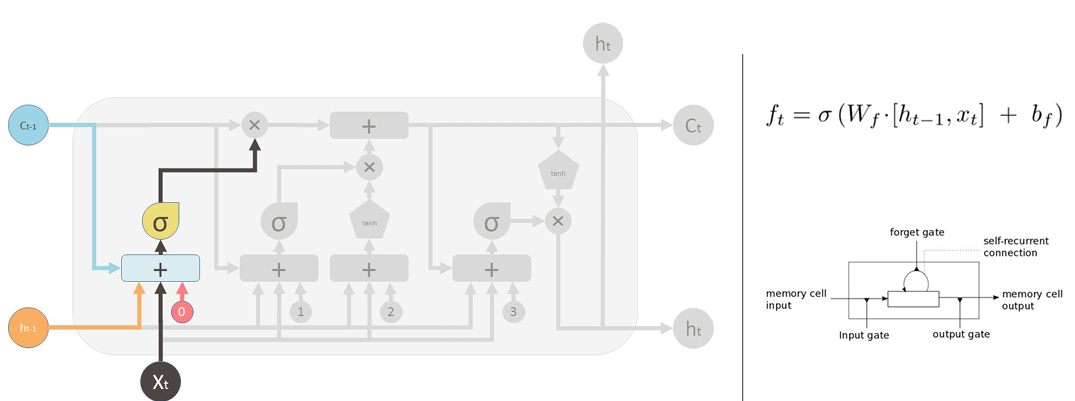

### **Input Gate**
- Controls what new information is added to cell state from current input.

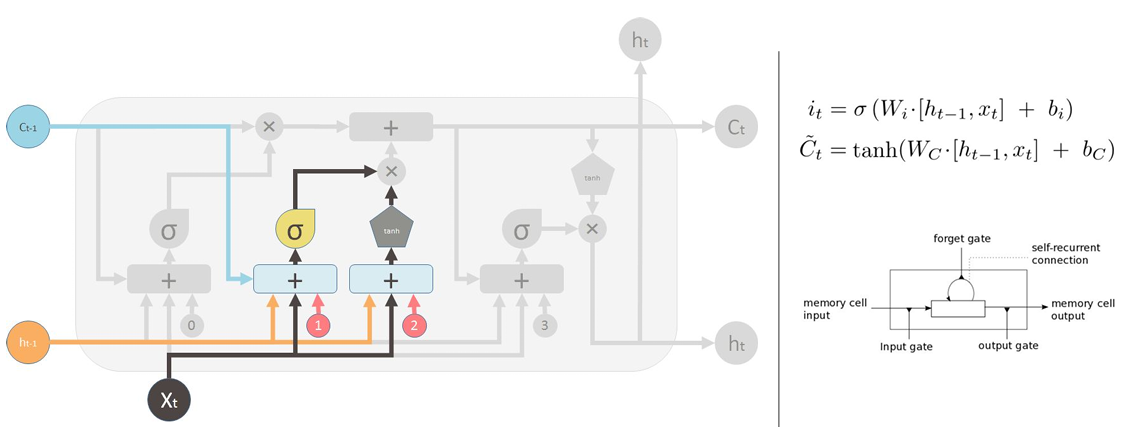

### **Memory Update**
- The cell state vector aggregates the two components (old memory via the forget gate and new memory via the input gate)

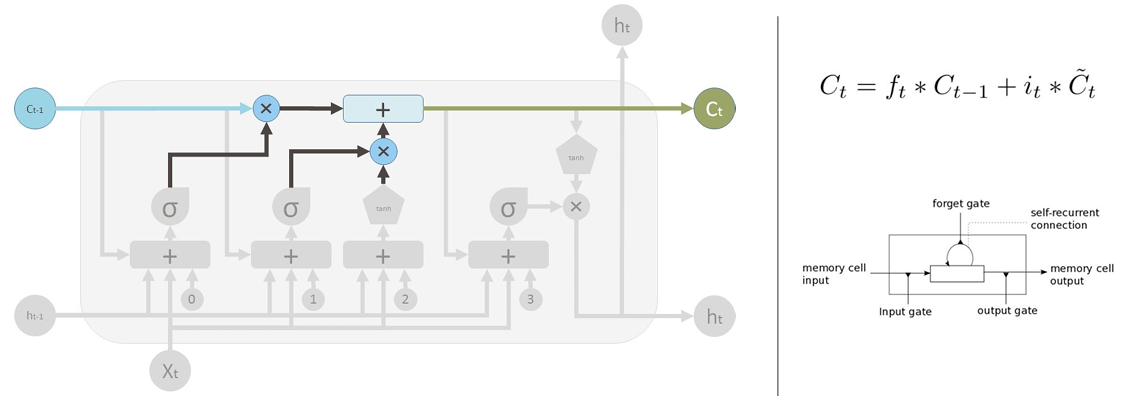

### **Output Gate**
- Conditionally decides what to output from the memory

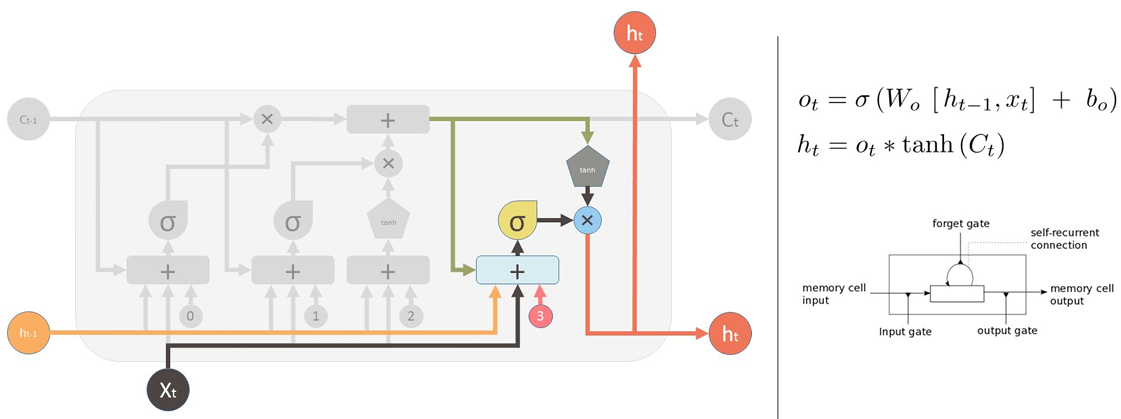

---
### **LSTM Memory Cell Summary**
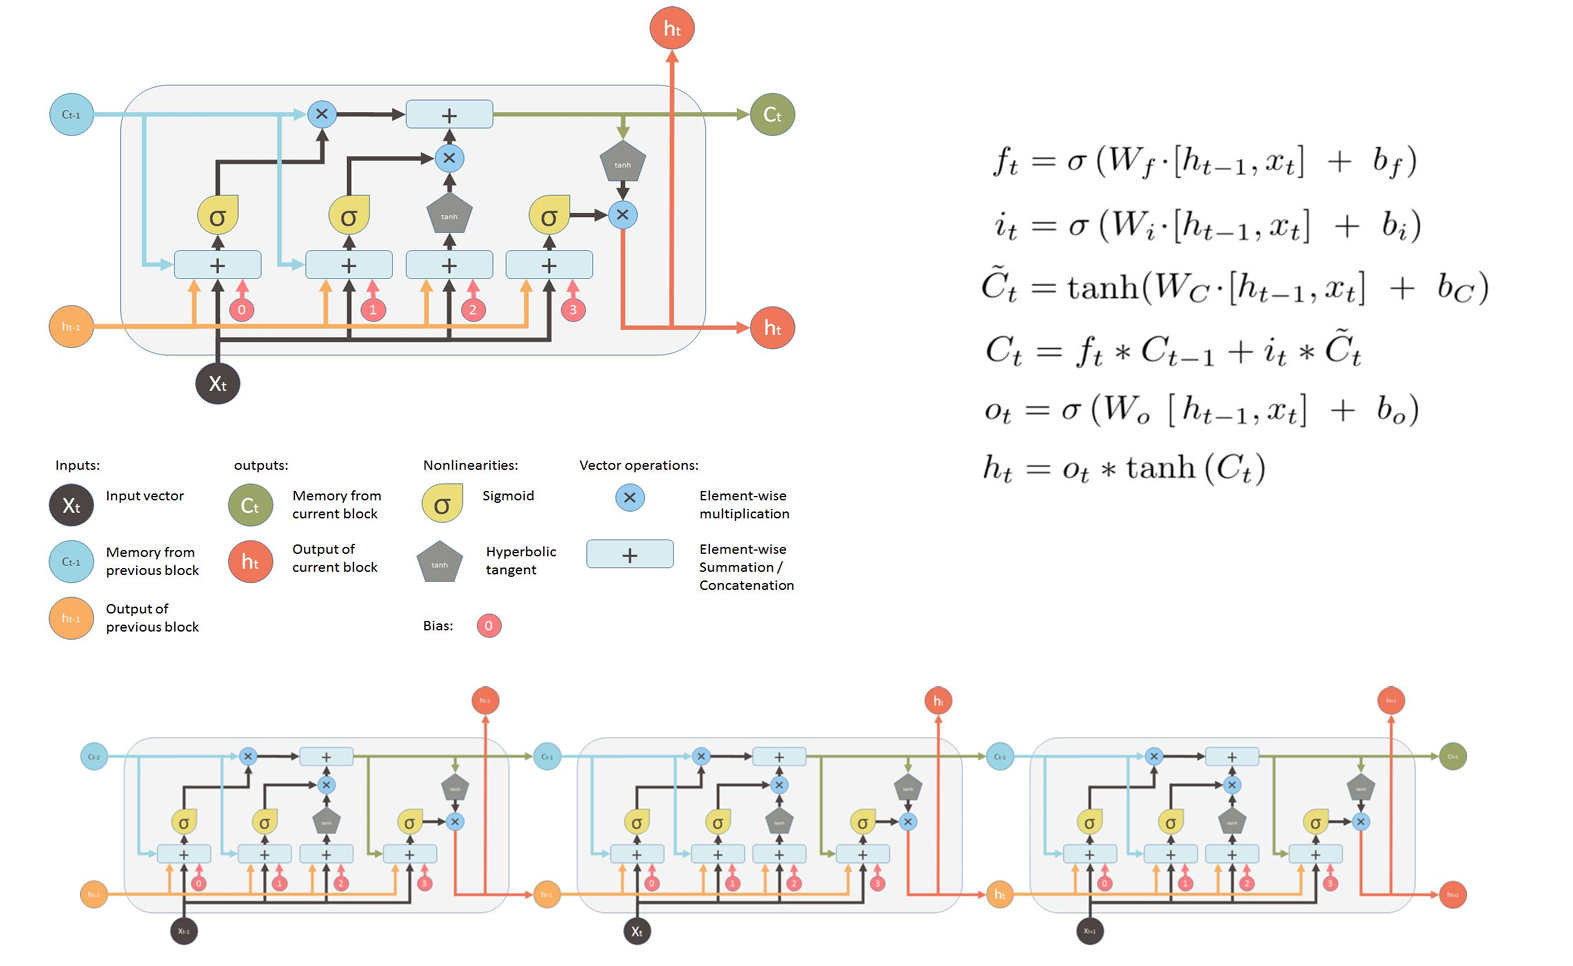

Reference: https://pytorch.org/tutorials/intermediate/char_rnn_classification_tutorial.html

### Preparing Torch

In [3]:
import torch

# Check if CUDA is available
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')

torch.set_default_device(device)
print(f"Using device = {torch.get_default_device()}")

Using device = cpu


### Preparing the Data

Download the data from https://download.pytorch.org/tutorial/data.zip and extract it to the current directory.

Included in the data/names directory are 18 text files named as [Language].txt. Each file contains a bunch of names, one name per line, mostly romanized (but we still need to convert from Unicode to ASCII).

The first step is to define and clean our data. Initially, we need to convert Unicode to plain ASCII to limit the RNN input layers. This is accomplished by converting Unicode strings to ASCII and allowing only a small set of allowed characters.

In [4]:
import string
import unicodedata

allowed_characters = string.ascii_letters + " .,;'"
n_letters = len(allowed_characters)

# Turn a Unicode string to plain ASCII, thanks to https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in allowed_characters
    )

Here’s an example of converting a unicode alphabet name to plain ASCII. This simplifies the input layer

In [ ]:
print (f"converting 'Ślusàrski' to {unicodeToAscii('Ślusàrski')}")

converting 'Ślusàrski' to Slusarski


### Turning Names into Tensors

Now that we have all the names organized, we need to turn them into Tensors to make any use of them.

To represent a single letter, we use a “one-hot vector” of size `<1 x n_letters>`. A one-hot vector is filled with 0s except for a 1 at index of the current letter, e.g. `"b" = <0 1 0 0 0 ...>`.

To make a word we join a bunch of those into a 2D matrix `<line_length x 1 x n_letters>`.

That extra 1 dimension is because PyTorch assumes everything is in batches - we’re just using a batch size of 1 here.

In [11]:
# Find letter index from all_letters, e.g. "a" = 0
def letterToIndex(letter):
    return allowed_characters.find(letter)

# Turn a line into a <line_length x 1 x n_letters>,
# or an array of one-hot letter vectors
def lineToTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li, letter in enumerate(line):
        tensor[li][0][letterToIndex(letter)] = 1
    return tensor

Here are some examples of how to use `lineToTensor()` for a single and multiple character string.

In [12]:
print (f"The letter 'a' becomes {lineToTensor('a')}") #notice that the first position in the tensor = 1
print (f"The name 'Ahn' becomes {lineToTensor('Ahn')}") #notice 'A' sets the 27th index to 1

The letter 'a' becomes tensor([[[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]]])
The name 'Ahn' becomes tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

Now we built the foundational tensor objects for this learning task! You can use a similar approach for other RNN tasks with text.

Next, we need to combine all our examples into a dataset so we can train, test and validate our models. For this, we will use the Dataset and DataLoader classes to hold our dataset. Each Dataset needs to implement three functions: `__init__`, `__len__`, and `__getitem__`.

In [ ]:
from io import open
import glob
import os
import time

import torch
from torch.utils.data import Dataset

class NamesDataset(Dataset):

    def __init__(self, data_dir):
        self.data_dir = data_dir #for provenance of the dataset
        self.load_time = time.localtime #for provenance of the dataset
        labels_set = set() #set of all classes

        self.data = []
        self.data_tensors = []
        self.labels = []
        self.labels_tensors = []

        #read all the ``.txt`` files in the specified directory
        text_files = glob.glob(os.path.join(data_dir, '*.txt'))
        for filename in text_files:
            label = os.path.splitext(os.path.basename(filename))[0]
            labels_set.add(label)
            lines = open(filename, encoding='utf-8').read().strip().split('\n')
            for name in lines:
                self.data.append(name)
                self.data_tensors.append(lineToTensor(name))
                self.labels.append(label)

        #Cache the tensor representation of the labels
        self.labels_uniq = list(labels_set)
        for idx in range(len(self.labels)):
            temp_tensor = torch.tensor([self.labels_uniq.index(self.labels[idx])], dtype=torch.long)
            self.labels_tensors.append(temp_tensor)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        data_item = self.data[idx]
        data_label = self.labels[idx]
        data_tensor = self.data_tensors[idx]
        label_tensor = self.labels_tensors[idx]

        return label_tensor, data_tensor, data_label, data_item

Here we can load our example data into the NamesDataset

In [ ]:
alldata = NamesDataset("data/names")
print(f"loaded {len(alldata)} items of data")
print(f"example = {alldata[0]}")

loaded 20074 items of data
example = (tensor([8]), tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 

Using the dataset object allows us to easily split the data into train and test sets. Here we create a 80/20
split but the `torch.utils.data` has more useful utilities. Here we specify a generator since we need to use the

same device as PyTorch defaults to above.

In [ ]:
train_set, test_set = torch.utils.data.random_split(alldata, [.85, .15], generator=torch.Generator(device=device).manual_seed(2024))

print(f"train examples = {len(train_set)}, validation examples = {len(test_set)}")

train examples = 17063, validation examples = 3011


Now we have a basic dataset containing 20074 examples where each example is a pairing of label and name. We have also split the dataset into training and testing so we can validate the model that we build.

### Creating the Network

Before autograd, creating a recurrent neural network in Torch involved cloning the parameters of a layer over several timesteps. The layers held hidden state and gradients which are now entirely handled by the graph itself. This means you can implement a RNN in a very “pure” way, as regular feed-forward layers.

This CharRNN class implements an RNN with three components. First, we use the **nn.RNN implementation**. Next, we define a layer that maps the RNN hidden layers to our output. And finally, we apply a `softmax` function. Using `nn.RNN` leads to a significant improvement in performance, such as cuDNN-accelerated kernels, versus implementing each layer as a `nn.Linear`. It also simplifies the implementation in `forward()`.

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class CharRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(CharRNN, self).__init__()

        self.rnn = nn.RNN(input_size, hidden_size)
        self.h2o = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, line_tensor):
        rnn_out, hidden = self.rnn(line_tensor)
        output = self.h2o(hidden[0])
        output = self.softmax(output)

        return output

We can then create an RNN with 57 input nodes, 128 hidden nodes, and 18 outputs:

In [ ]:
n_hidden = 128
rnn = CharRNN(n_letters, n_hidden, len(alldata.labels_uniq))
print(rnn)

CharRNN(
  (rnn): RNN(57, 128)
  (h2o): Linear(in_features=128, out_features=18, bias=True)
  (softmax): LogSoftmax(dim=1)
)


After that we can pass our Tensor to the RNN to obtain a predicted output. Subsequently, we use a helper function, `label_from_output`, to derive a text label for the class.

In [ ]:
def label_from_output(output, output_labels):
    top_n, top_i = output.topk(1)
    label_i = top_i[0].item()
    return output_labels[label_i], label_i

input = lineToTensor('Albert')
output = rnn(input) #this is equivalent to ``output = rnn.forward(input)``
print(output)
print(label_from_output(output, alldata.labels_uniq))

tensor([[-2.9277, -2.7069, -2.9278, -2.8210, -2.9576, -2.8855, -2.8376, -3.0300,
         -2.7682, -2.9271, -2.8577, -3.0371, -2.8802, -2.8729, -2.9006, -2.9444,
         -2.8548, -2.9475]], grad_fn=<LogSoftmaxBackward0>)
('English', 1)


### Training
#### Training the Network

Now all it takes to train this network is show it a bunch of examples, have it make guesses, and tell it if it’s wrong.

We do this by defining a `train()` function which trains the model on a given dataset using minibatches. RNNs RNNs are trained similarly to other networks; therefore, for completeness, we include a batched training method here. The loop (`for i in batch`) computes the losses for each of the items in the batch before adjusting the weights. This operation is repeated until the number of epochs is reached.

In [ ]:
import random
import numpy as np

def train(rnn, training_data, n_epoch = 10, n_batch_size = 64, report_every = 50, learning_rate = 0.2, criterion = nn.NLLLoss()):
    """
    Learn on a batch of training_data for a specified number of iterations and reporting thresholds
    """
    # Keep track of losses for plotting
    current_loss = 0
    all_losses = []
    rnn.train()
    optimizer = torch.optim.SGD(rnn.parameters(), lr=learning_rate)

    start = time.time()
    print(f"training on data set with n = {len(training_data)}")

    for iter in range(1, n_epoch + 1):
        rnn.zero_grad() # clear the gradients

        # create some minibatches
        # we cannot use dataloaders because each of our names is a different length
        batches = list(range(len(training_data)))
        random.shuffle(batches)
        batches = np.array_split(batches, len(batches) //n_batch_size )

        for idx, batch in enumerate(batches):
            batch_loss = 0
            for i in batch: #for each example in this batch
                (label_tensor, text_tensor, label, text) = training_data[i]
                output = rnn.forward(text_tensor)
                loss = criterion(output, label_tensor)
                batch_loss += loss

            # optimize parameters
            batch_loss.backward()
            nn.utils.clip_grad_norm_(rnn.parameters(), 3)
            optimizer.step()
            optimizer.zero_grad()

            current_loss += batch_loss.item() / len(batch)

        all_losses.append(current_loss / len(batches) )
        if iter % report_every == 0:
            print(f"{iter} ({iter / n_epoch:.0%}): \t average batch loss = {all_losses[-1]}")
        current_loss = 0

    return all_losses

We can now train a dataset with minibatches for a specified number of epochs. The number of epochs for this example is reduced to speed up the build. You can get better results with different parameters.

In [ ]:
start = time.time()
all_losses = train(rnn, train_set, n_epoch=27, learning_rate=0.15, report_every=5)
end = time.time()
print(f"training took {end-start}s")

training on data set with n = 17063
5 (19%): 	 average batch loss = 0.8762721825931856
10 (37%): 	 average batch loss = 0.6936237914273338
15 (56%): 	 average batch loss = 0.5768476912470619
20 (74%): 	 average batch loss = 0.4968256758283576
25 (93%): 	 average batch loss = 0.43685488225563607
training took 649.8902161121368s


### Plotting the Results

Plotting the historical loss from all_losses shows the network learning:

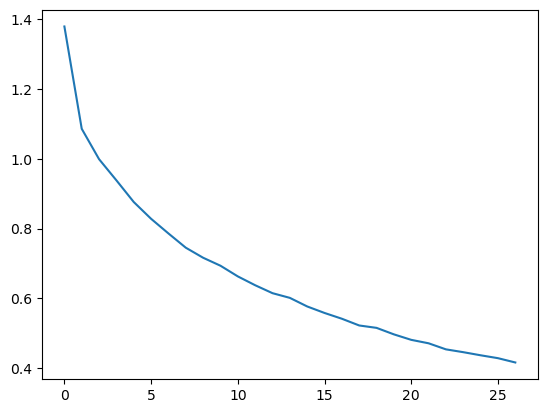

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)
plt.show()

### Evaluating the Results

To see how well the network performs on different categories, we will create a confusion matrix, indicating for every actual language (rows) which language the network guesses (columns). To calculate the confusion matrix a bunch of samples are run through the network with `evaluate()`, which is the same as `train()` minus the backprop.

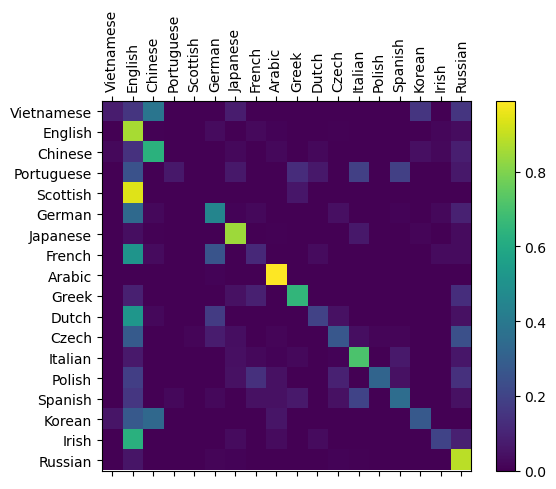

In [ ]:
def evaluate(rnn, testing_data, classes):
    confusion = torch.zeros(len(classes), len(classes))

    rnn.eval() #set to eval mode
    with torch.no_grad(): # do not record the gradients during eval phase
        for i in range(len(testing_data)):
            (label_tensor, text_tensor, label, text) = testing_data[i]
            output = rnn(text_tensor)
            guess, guess_i = label_from_output(output, classes)
            label_i = classes.index(label)
            confusion[label_i][guess_i] += 1

    # Normalize by dividing every row by its sum
    for i in range(len(classes)):
        denom = confusion[i].sum()
        if denom > 0:
            confusion[i] = confusion[i] / denom

    # Set up plot
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(confusion.cpu().numpy()) #numpy uses cpu here so we need to use a cpu version
    fig.colorbar(cax)

    # Set up axes
    ax.set_xticks(np.arange(len(classes)), labels=classes, rotation=90)
    ax.set_yticks(np.arange(len(classes)), labels=classes)

    # Force label at every tick
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    # sphinx_gallery_thumbnail_number = 2
    plt.show()



evaluate(rnn, test_set, classes=alldata.labels_uniq)

You can pick out bright spots off the main axis that show which languages it guesses incorrectly, e.g. Chinese for Korean, and Spanish for Italian. It seems to do very well with Greek, and very poorly with English (perhaps because of overlap with other languages).